In [ ]:
#Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
#Read the data
df = pd.read_excel("AIDA_Week10_HW_PCA_Data.xlsx")
df = df.iloc[:,1:3]
print(df.head())

    x1   x2
0  3.5  1.9
1  1.5  0.2
2  3.2  2.4
3  2.9  1.7
4  4.1  2.5
Cov Mat 
%s [[1.28  1.04  0.64  0.96  1.28  0.88  1.52  1.12  1.12  1.36 ]
 [1.04  0.845 0.52  0.78  1.04  0.715 1.235 0.91  0.91  1.105]
 [0.64  0.52  0.32  0.48  0.64  0.44  0.76  0.56  0.56  0.68 ]
 [0.96  0.78  0.48  0.72  0.96  0.66  1.14  0.84  0.84  1.02 ]
 [1.28  1.04  0.64  0.96  1.28  0.88  1.52  1.12  1.12  1.36 ]
 [0.88  0.715 0.44  0.66  0.88  0.605 1.045 0.77  0.77  0.935]
 [1.52  1.235 0.76  1.14  1.52  1.045 1.805 1.33  1.33  1.615]
 [1.12  0.91  0.56  0.84  1.12  0.77  1.33  0.98  0.98  1.19 ]
 [1.12  0.91  0.56  0.84  1.12  0.77  1.33  0.98  0.98  1.19 ]
 [1.36  1.105 0.68  1.02  1.36  0.935 1.615 1.19  1.19  1.445]]


In [ ]:
import statistics
#calculate the center of the data
avg_x1 = statistics.mean(df.x1)
avg_x2 = statistics.mean(df.x2)
print(avg_x1,avg_x2)

2.81 1.4100000000000001


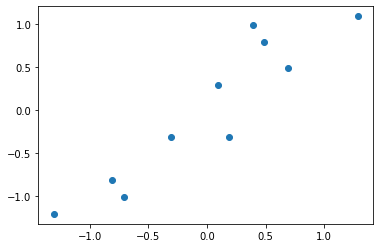

In [ ]:
#this cordinate will be the new center of the graph
#we need to shift the data points accordingly
#1. centre the data
new_x1, new_x2 = df.x1-avg_x1, df.x2-avg_x2
plt.scatter(new_x1, new_x2)
plt.show()

In [ ]:
#but before that let's create a new data set with these two new rows
df.x1 = new_x1
df.x2 = new_x2

In [ ]:
#the slope ofthe pc tells the ratio between the features, (fetures are the input parameters), 
#tell you which features
#are more imp, in other words, PC1 is the linear combination of the features
#2. Calculate the Covariance Matrix
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(df , rowvar = False)
print(cov_mat)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [ ]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eig_vals , eig_vec = np.linalg.eigh(cov_mat)
print(eig_vals ,"\n", eig_vec)

[0.0490834  1.28402771] 
 [[-0.73517866  0.6778734 ]
 [ 0.6778734   0.73517866]]


In [ ]:
#4. Sort Eigenvalues in descending order
sorted_index = np.argsort(eig_vals)[::-1]
#print(sorted_index)
sorted_eig_val = eig_vals[sorted_index]
#print(sorted_eigenvalue)
#similarly sort the eigenvectors 
sorted_eig_vec = eig_vec[:,sorted_index]

In [ ]:
#choose the number of eigenvectors you think are enough
eig_vec_subset = sorted_eig_vec[:,0:2]
print(eig_vec_subset)

[[ 0.6778734  -0.73517866]
 [ 0.73517866  0.6778734 ]]


In [ ]:
#transform the data: dot product between the (eigenvector)T and (mean-centred dataset)T
dim_reduction = np.dot(eig_vec_subset.transpose(), df.transpose()).transpose()
print(dim_reduction)
#the first column refers to PC1 and Second column refers to PC2

[[ 0.82797019 -0.17511531]
 [-1.77758033  0.14285723]
 [ 0.99219749  0.38437499]
 [ 0.27421042  0.13041721]
 [ 1.67580142 -0.20949846]
 [ 0.9129491   0.17528244]
 [-0.09910944 -0.3498247 ]
 [-1.14457216  0.04641726]
 [-0.43804614  0.01776463]
 [-1.22382056 -0.16267529]]


Resource used: 
https://www.askpython.com/python/examples/principal-component-analysis
